In [19]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from my_img_processor import My_Image
import matplotlib as mpl
import cv2
from scipy.ndimage import label

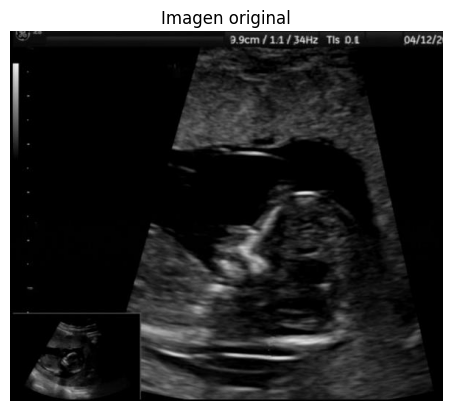

In [33]:
img_path = r'Dataset for Fetus Framework\Dataset for Fetus Framework\External Test Set\Standard\1426.png'
raw_img = My_Image(img_path)

fig_raw, ax_raw = plt.subplots()
ax_raw.imshow(raw_img, vmin=0, vmax=255, cmap='gray')
ax_raw.set_title('Imagen original')
plt.axis('off')
plt.show()

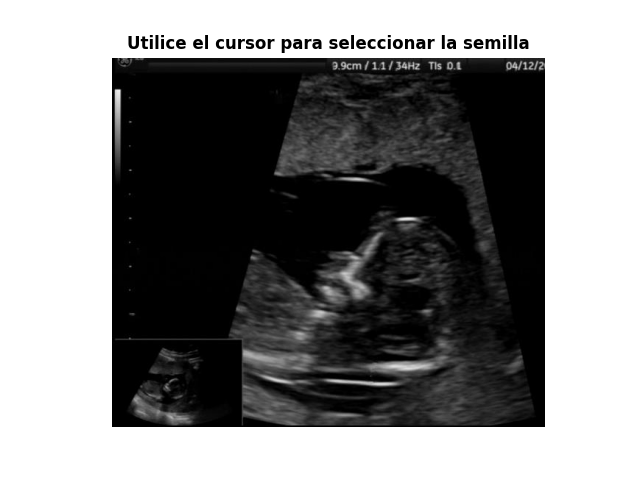

x=345, y=434


No such comm: d1aed95613914feba00505efc8146dcd
No such comm: d1aed95613914feba00505efc8146dcd
No such comm: d1aed95613914feba00505efc8146dcd


In [34]:
%matplotlib widget
x, y = 330, 370
def interactive_plot(img):
   plt.ion()
   fig, ax = plt.subplots()
   fig.canvas.set_cursor(mpl.backend_tools.Cursors.SELECT_REGION)
   ax.set_title('Utilice el cursor para seleccionar la semilla', fontweight='bold')
   def onclick(event):
      global x
      global y
      x = int(np.ceil(event.xdata))
      y = int(np.ceil(event.ydata))
      print(f"{x=}, {y=}")
      ax.plot(x, y, marker='x', color='yellow')
      ax.figure.canvas.draw()
      fig.canvas.set_cursor(mpl.backend_tools.Cursors.SELECT_REGION)

   ax.imshow(img, vmin=0, vmax=255, cmap='gray')
   plt.axis(False)
   fig.canvas.mpl_connect('button_press_event', onclick)
   plt.show()

interactive_plot(raw_img)

In [35]:
plt.close()
%matplotlib inline

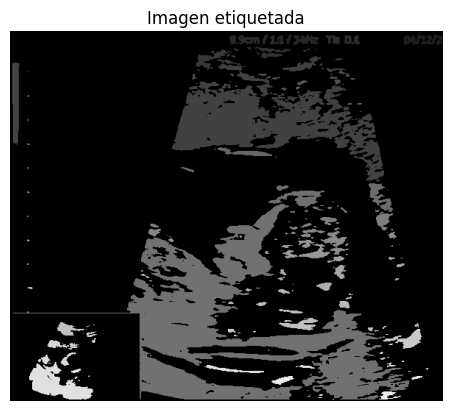

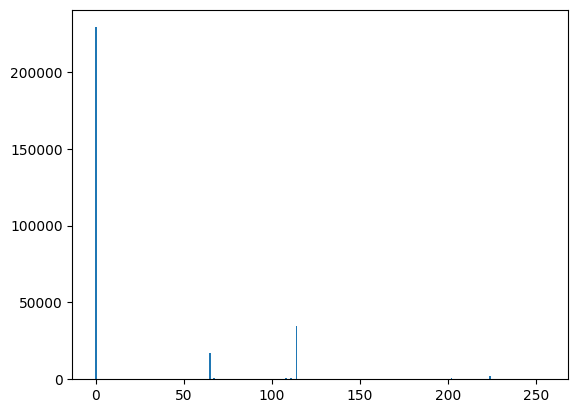

In [36]:
# Etiquetamos
imagen_binaria = raw_img.binarizar_otsu()
imagen_etiquetada, num_features = imagen_binaria.etiquetar_componentes()

plt.imshow(imagen_etiquetada, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagen etiquetada')
imagen_etiquetada.get_hist(plot=True);


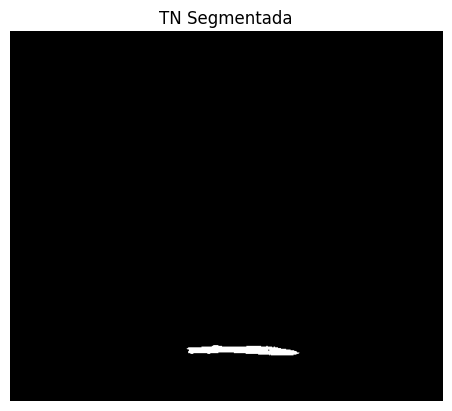

In [37]:
# Invertimos y extraemos la seccion
imagen_invertida = imagen_etiquetada.invertir_imagen()
#Definir el punto 
punto = (x, y)
#Extraer el area
area_extraida = imagen_invertida.extraer_area_por_intensidad(punto)

plt.imshow(area_extraida, vmin=0, vmax=255, cmap='gray')
plt.axis(False)
plt.title('TN Segmentada')
plt.show()


Text(0.5, 1.0, 'Aplicamos sal y pimienta')

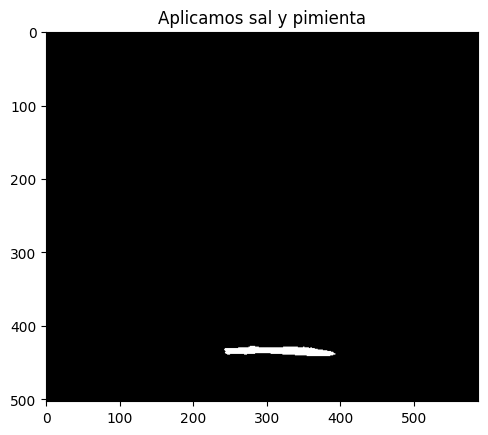

In [38]:
# Aplicamos sal y pimienta
area_extraida_limpia = area_extraida.median_filter(window_size=3)
plt.imshow(area_extraida_limpia, vmin=0, vmax=255, cmap='gray')
plt.title('Aplicamos sal y pimienta')

In [39]:
# Hallamos el borde
KL1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
border_seg = area_extraida_limpia.filter_w_kernel(KL1)

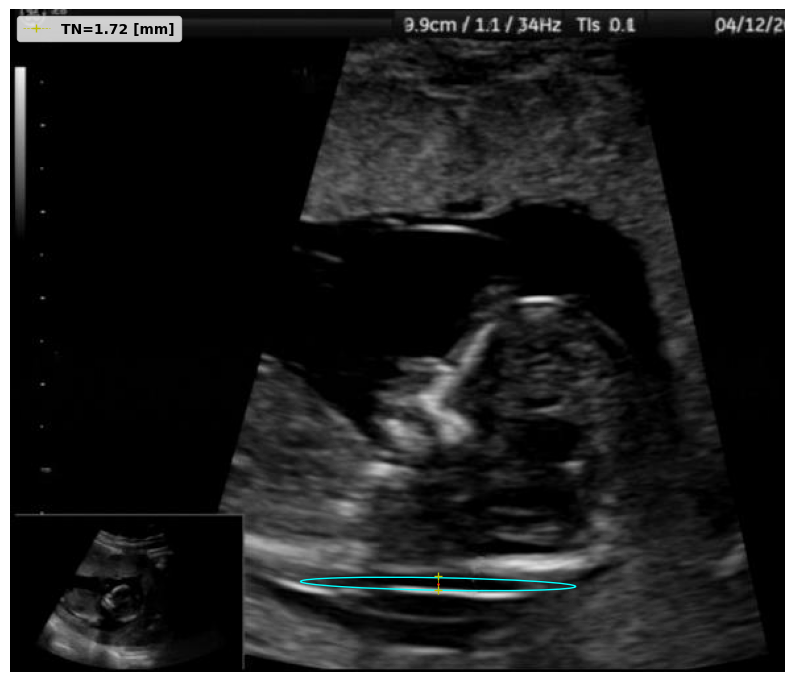

In [41]:
# Fitteamos la elipse nuevamente
ellipse_patch = border_seg.fit_ellipse()
raw_img.plot_with_ellipse(ellipse_patch, c=1/0.1719077568134172)